In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/honeyproduction.csv')

In [3]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


In [5]:
df.isnull().sum()

,0
state,0
numcol,0
yieldpercol,0
totalprod,0
stocks,0
priceperlb,0
prodvalue,0
year,0


In [6]:
df.duplicated().sum()

0

In [7]:
# Types of variables
df.select_dtypes(include=np.number).head()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [8]:
df.select_dtypes(include=np.number).describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


In [9]:
df.select_dtypes(include='object').head()

,state
0,AL
1,AZ
2,AR
3,CA
4,CO


In [10]:
df.select_dtypes(include='object').describe()

,state
count,626
unique,44
top,AL
freq,15


## **Univariate Analysis**

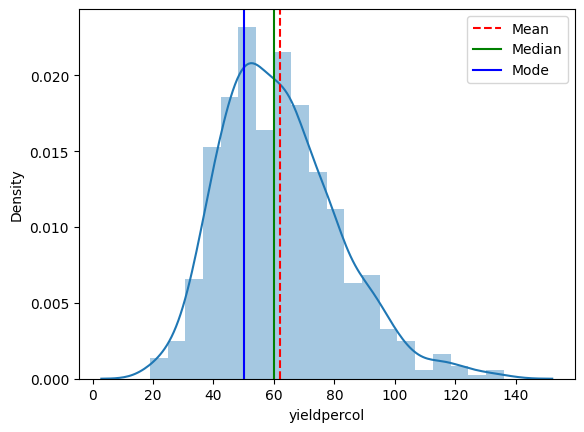

Mean : 62.00958466453674
Median : 60.0
Mode : 50


In [11]:
# Measure of cetral tendency 'yieldpercol'
mean = df['yieldpercol'].mean()
median = df['yieldpercol'].median()
mode = df['yieldpercol'].mode().values[0]

sns.distplot(df['yieldpercol'])
plt.axvline(mean, color='r', linestyle='--', label = 'Mean')
plt.axvline(median, color='g', linestyle='-', label = 'Median')
plt.axvline(mode, color='b', linestyle ='-', label= 'Mode')
plt.legend()
plt.show()


print('Mean :',mean)
print('Median :',median)
print('Mode :',mode)

In [12]:
# Measure of dispersion
#  1. variance
df['yieldpercol'].var()

378.64310798722056

In [13]:
#  2. Standard deviation

df['totalprod'].std()

6883846.751268288

In [14]:
#  3. Range
print('Largets value :', df['totalprod'].max())
print('Smallest value :', df['totalprod'].min())
print('Range : ', df['totalprod'].max()-df['totalprod'].min())

Largets value : 46410000.0
Smallest value : 84000.0
Range :  46326000.0


In [15]:
# Interquartile Range

Q1 = df['totalprod'].quantile(0.25)
Q2 = df['totalprod'].quantile(0.5)
Q3 = df['totalprod'].quantile(0.75)
IQR = Q3 - Q1
print('Q1 : ',Q1)
print('Q2 : ',Q2)
print('Q3 : ',Q3)
print('~'*15)
print('IQR :',IQR)

Q1 :  475000.0
Q2 :  1533000.0
Q3 :  4175250.0
~~~~~~~~~~~~~~~
IQR : 3700250.0


In [16]:
df['year'].unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012])

In [17]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


## **Univariate Analysis using visualisation**

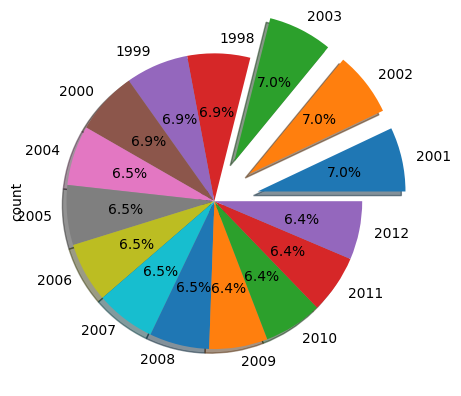

In [18]:
# Categorical variable
df['year'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.3,0.3,0.3,0,0,0,0,0,0,0,0,0,0,0,0], shadow=True)
plt.show()

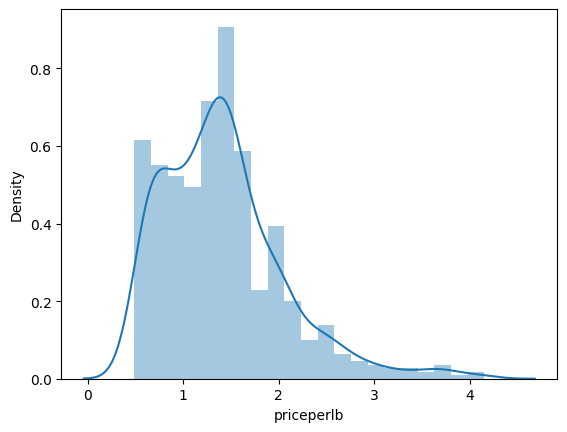

In [19]:
# Numerical Varable
sns.distplot(df['priceperlb'])
plt.show()

## **Bivariate Analysis**

In [20]:
df.columns

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')

In [21]:
# Heatmap, creating correlation matrix
corr_matrix = df[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']].corr()
corr_matrix

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
numcol,1.000000,0.243515,0.953594,0.825929,-0.232701,0.912796
yieldpercol,0.243515,1.000000,0.396252,0.367812,-0.358646,0.278977
totalprod,0.953594,0.396252,1.000000,0.878830,-0.264499,0.907236
stocks,0.825929,0.367812,0.878830,1.000000,-0.305867,0.728560
priceperlb,-0.232701,-0.358646,-0.264499,-0.305867,1.000000,-0.089567
prodvalue,0.912796,0.278977,0.907236,0.728560,-0.089567,1.000000


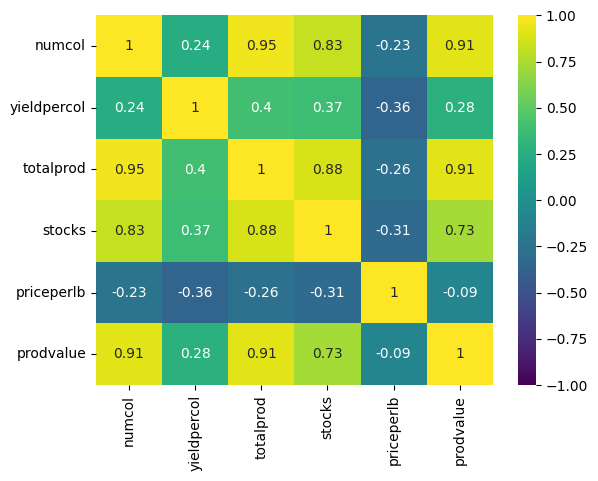

In [22]:
# heatmap helps in visualizing correlation amongst features
sns.heatmap(corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.show()

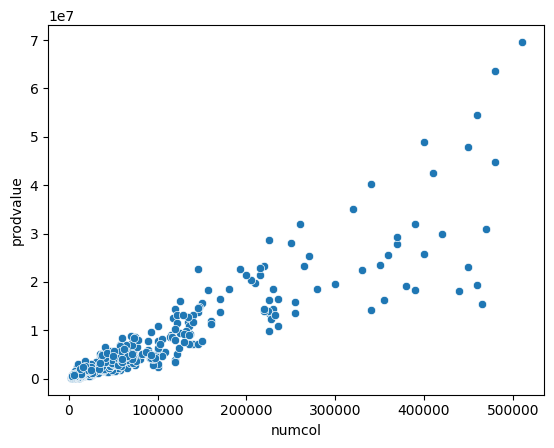

In [23]:
# Continous vs Continous
sns.scatterplot(x = df['numcol'], y = df['prodvalue'])
plt.show()

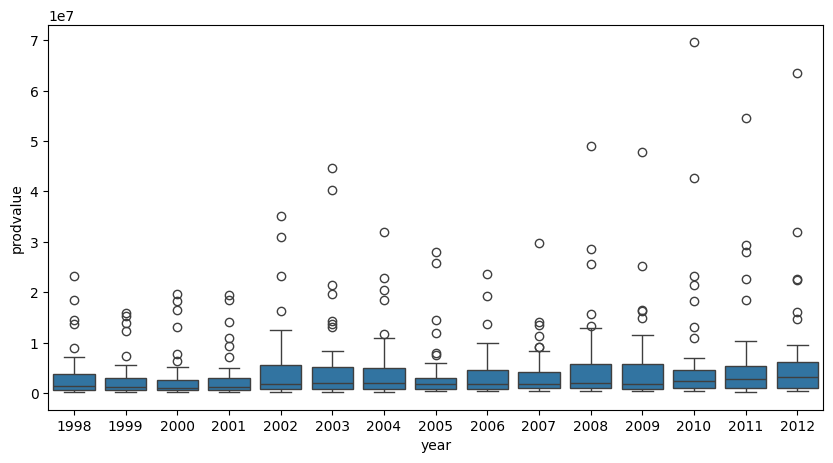

In [24]:
# Continous vs Categorical
plt.figure(figsize=(10, 5))
sns.boxplot(x = df['year'], y= df['prodvalue'])
plt.show()

In [25]:
# Continous vs Categorical
df_state = df[df['state'].isin(['AL','CO','SC','NV','MD'])]

In [26]:
pd.crosstab(df_state['state'], df_state['year'])

year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
state,,,,,,,,,,,,,,,
AL,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
CO,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
MD,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
NV,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0
SC,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0


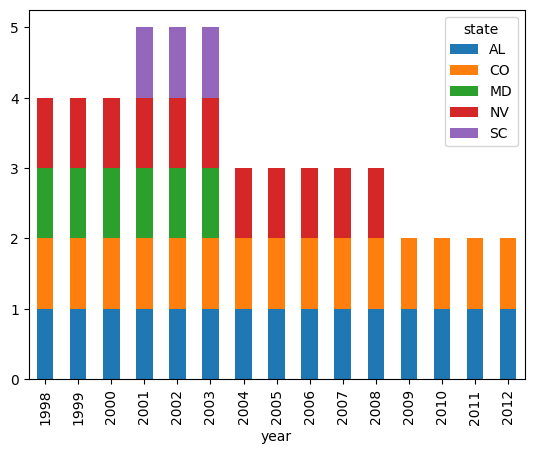

In [27]:
# Stacked bar graph
pd.crosstab(df_state['year'], df_state['state']).plot(kind='bar', stacked=True)
plt.show()

## **Multivariate Analysis**

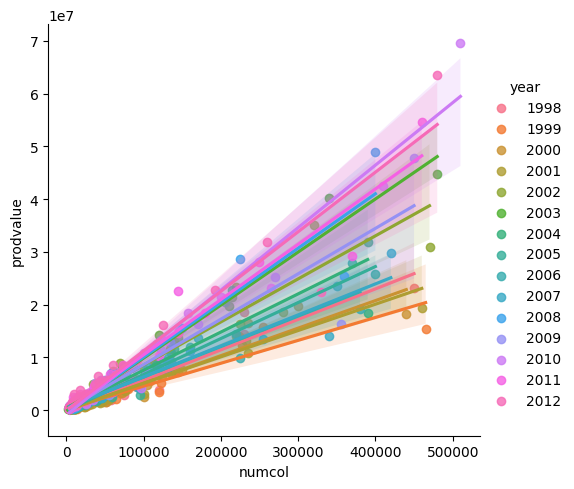

In [28]:
# 1 Lmp plot
sns.lmplot(x='numcol',y='prodvalue', data=df, hue='year')
plt.show()

In [29]:
# Box plot
## creating a new column yieldpercol_group by grouping the values of yieldpercol
df["yieldpercol_group"] = pd.cut(df.yieldpercol, [30,50,70,90,100,130])

## creating a new column year_group by grouping the values of year
df['year_group'] = pd.cut(df.year,[1998,2005,2012])

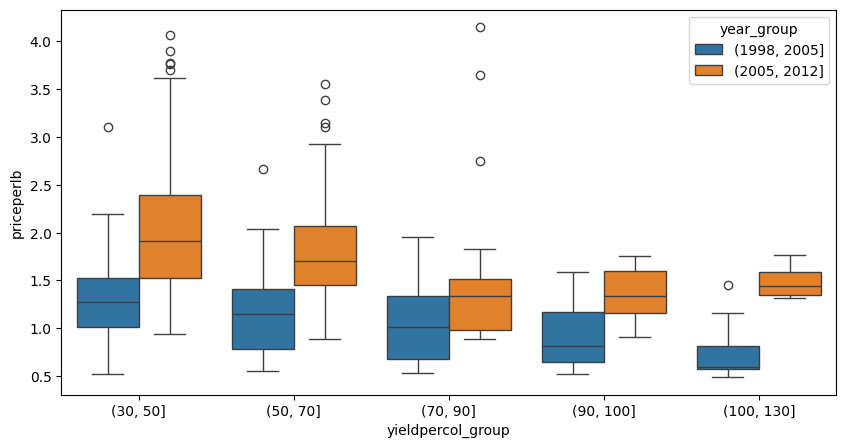

In [30]:
## using the
plt.figure(figsize=(10,5))
sns.boxplot(x=df['yieldpercol_group'],y=df['priceperlb'],hue='year_group',data=df)
plt.show()

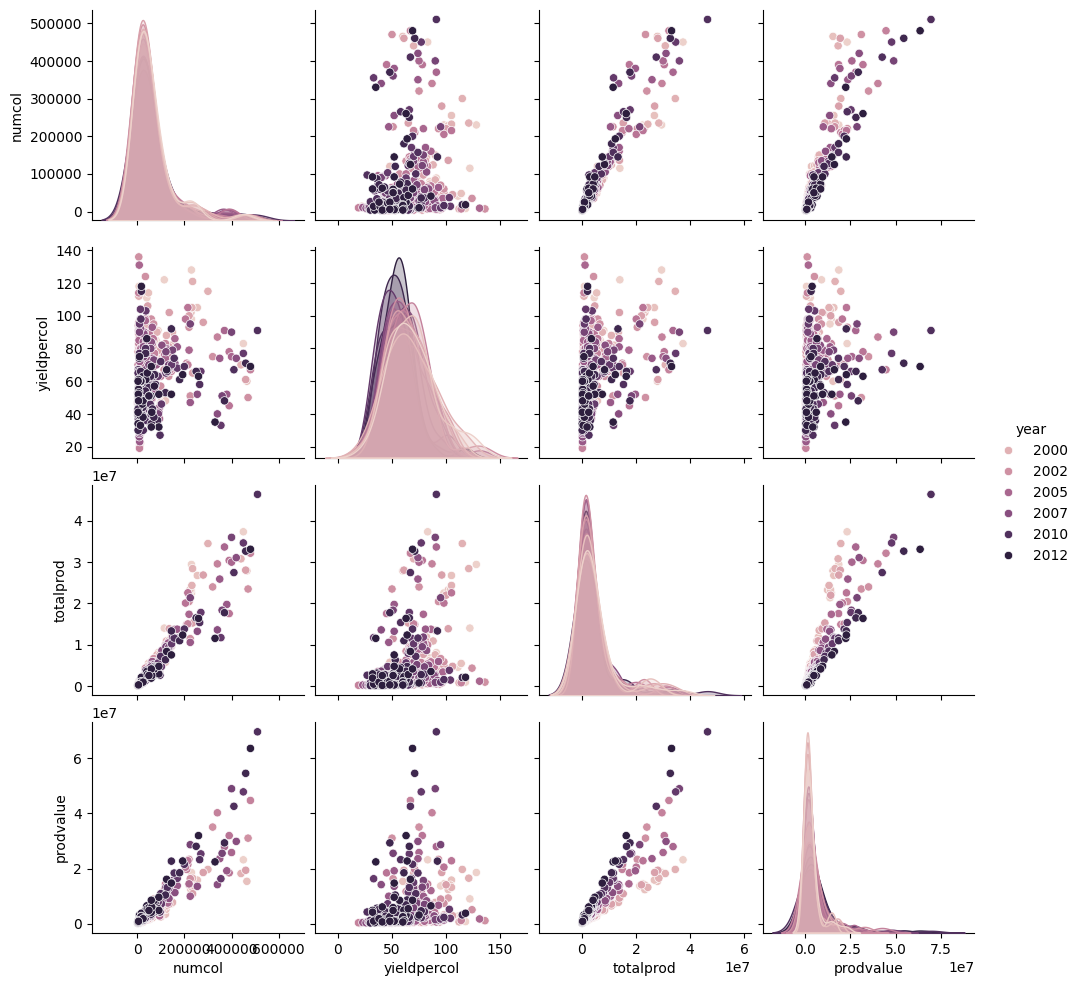

In [31]:
# Pairplot
df_pairplot = df[['numcol', 'yieldpercol', 'totalprod', 'prodvalue','year']]
sns.pairplot(df_pairplot,hue='year')
plt.show()

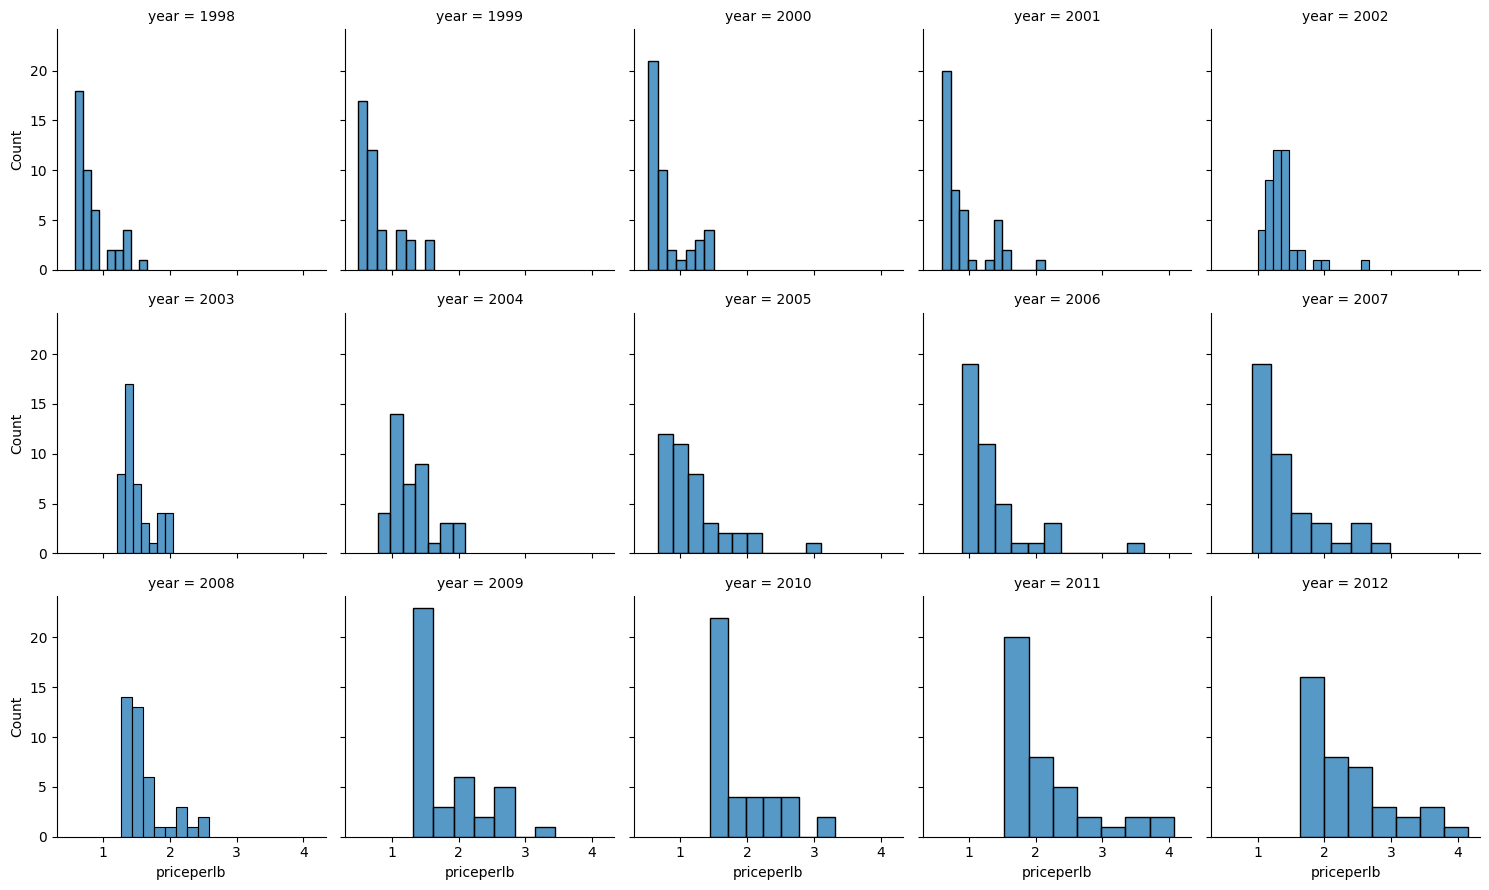

In [32]:
# Facet grid
ax = sns.FacetGrid(df,col='year', col_wrap=5)
ax.map_dataframe(sns.histplot, x='priceperlb')
plt.show()

In [33]:
import plotly.express as px

In [34]:
import plotly.express as px
fig = px.scatter(x=df['numcol'], y=df['prodvalue'], color=df['state'], animation_frame=df['year'])
fig.show()